In [3]:
from re import M
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)

model = Sequential([
    layers.Embedding(max_features, 128),
    layers.LSTM(32),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics = ['acc'])

history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 43s 264ms/step - loss: 0.5097 - acc: 0.7539 - val_loss: 0.3426 - val_acc: 0.8714
Epoch 2/10
157/157 [==============================] - 41s 263ms/step - loss: 0.3223 - acc: 0.8749 - val_loss: 0.3233 - val_acc: 0.8744
Epoch 3/10
157/157 [==============================] - 40s 256ms/step - loss: 0.2593 - acc: 0.9039 - val_loss: 0.3472 - val_acc: 0.8800
Epoch 4/10
157/157 [==============================] - 40s 253ms/step - loss: 0.2192 - acc: 0.9199 - val_loss: 0.7099 - val_acc: 0.7376
Epoch 5/10
157/157 [==============================] - 41s 261ms/step - loss: 0.1940 - acc: 0.9299 - val_loss: 0.4738 - val_acc: 0.8538
Epoch 6/10
157/157 [==============================] - 39s 249ms/step - loss: 0.1720 - acc: 0.9392 - val_loss: 0.3464 - val_acc: 0.8756
Epoch 7/10
157/157 [==============================] - 39s 250ms/step - loss: 0.1613 - acc: 0.9455 - val_loss: 0.3684 - val_acc: 0.8722
Epoch 8/10
157/157 [==============================] - 4

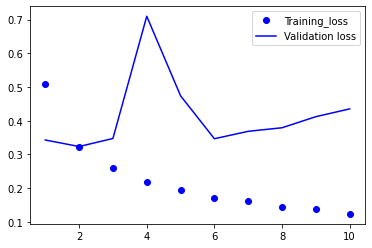

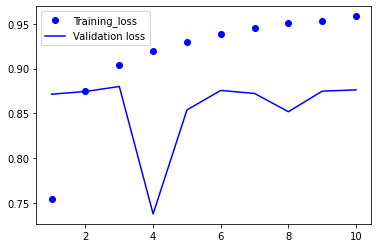

In [4]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss,'bo',label = 'Training_loss') 
plt.plot(epochs, val_loss,'b', label= 'Validation loss')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, acc,'bo',label = 'Training_loss') 
plt.plot(epochs, val_acc,'b', label= 'Validation loss')
plt.legend()
plt.show()